In [1]:
import time
import csv
from csv import reader
import pyorient
from pyArango.connection import *
from neo4j import GraphDatabase
from arango import ArangoClient
import matplotlib.pyplot as plt
import numpy as np

In [2]:
candidates = ['id.ac','ru.ac','ut.ac','acs.ac','kcu.ac']

In [3]:
with open('results_any/arangodb.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["2","3","4","5","6","7","8","9","10"])
    file.close()
with open('results_any/orientdb.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["2","3","4","5","6","7","8","9","10"])
    file.close()
with open('results_any/neo4j.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["2","3","4","5","6","7","8","9","10"])
    file.close()

In [4]:
def writedata(data,filepath):
    with open(filepath, 'a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(data)
        file.close()

In [5]:
# Orientdb Connection
client = pyorient.OrientDB("localhost", 2424)
client.set_session_token(True)
session_id = client.connect("root", "orientdb")
client.db_open( "new", "root", "orientdb" )

In [6]:
orientResult=[]
for apex in candidates:
    orientResult.append(apex)
    for depth in range(2,11):
        start_time = time.time()
        result = client.query("SELECT $path FROM (TRAVERSE both() FROM (SELECT @rid from `apex` where name = '{}') MAXDEPTH {})".format(apex,depth),1000,"*:-1")
        orientResult.append((time.time() - start_time))
    writedata(orientResult,'results_any/orientdb.csv')
    print(orientResult)
    orientResult=[]

['id.ac', 0.10096168518066406, 0.05386519432067871, 0.059763193130493164, 0.0756230354309082, 0.05243563652038574, 0.06117820739746094, 0.07164835929870605, 0.05710101127624512, 0.05239248275756836]
['ru.ac', 0.05312657356262207, 0.0519413948059082, 0.051177263259887695, 0.05314230918884277, 0.05190896987915039, 0.052247047424316406, 0.09420037269592285, 0.08577823638916016, 0.06292200088500977]
['ut.ac', 0.051192522048950195, 0.05268430709838867, 0.051468849182128906, 0.05388021469116211, 0.05209779739379883, 0.051589012145996094, 0.05185055732727051, 0.05164957046508789, 0.05060601234436035]
['acs.ac', 0.05266213417053223, 0.050844669342041016, 0.05060172080993652, 0.05200076103210449, 0.05247902870178223, 0.05209684371948242, 0.05268526077270508, 0.05624127388000488, 0.050910234451293945]
['kcu.ac', 0.0510098934173584, 0.051393985748291016, 0.05122685432434082, 0.053093671798706055, 0.05219078063964844, 0.05179142951965332, 0.051160573959350586, 0.05226922035217285, 0.05121469497680

In [7]:
client = ArangoClient(hosts='http://localhost:8529')
db = client.db('new', username='root', password='graphdbbenchmark')

In [8]:
arangoResult=[]
for apex in candidates:
    arangoResult.append(apex)
    for depth in range(2,11):
        query="""FOR v,e,p IN 1..{} ANY '{}' GRAPH 'final' OPTIONS {{ bfs:true,uniqueVertices: 'path',uniqueEdges: 'path',parallelism:5 }} LIMIT 1000 RETURN distinct p""".format(depth,apex)
        start_time = time.time()
        result = db.aql.execute(query)        
        arangoResult.append((time.time() - start_time))
    writedata(arangoResult,'results_any/arangodb.csv')
    print(arangoResult)
    arangoResult=[]

['id.ac', 0.012299299240112305, 0.003940105438232422, 0.0037131309509277344, 0.006139278411865234, 0.0036509037017822266, 0.008550167083740234, 0.0039288997650146484, 0.003633260726928711, 0.008384227752685547]
['ru.ac', 0.0041654109954833984, 0.007112979888916016, 0.003890514373779297, 0.0037293434143066406, 0.008425712585449219, 0.003979921340942383, 0.0037255287170410156, 0.0036525726318359375, 0.0038001537322998047]
['ut.ac', 0.003631114959716797, 0.003457784652709961, 0.0034699440002441406, 0.0036194324493408203, 0.003452777862548828, 0.0033674240112304688, 0.0035314559936523438, 0.003554821014404297, 0.0035247802734375]
['acs.ac', 0.0034873485565185547, 0.0035529136657714844, 0.003542184829711914, 0.003464221954345703, 0.003572702407836914, 0.003408193588256836, 0.0036122798919677734, 0.0037767887115478516, 0.0038471221923828125]
['kcu.ac', 0.0036873817443847656, 0.004589080810546875, 0.0038709640502929688, 0.0038149356842041016, 0.003729104995727539, 0.0037331581115722656, 0.003

In [9]:
# Neo4j Connection
uri = "neo4j://0.0.0.0:7687"
driver = GraphDatabase.driver(uri, auth=("neo4j", "test"))

In [10]:
neoResult=[]
for apex in candidates:
    neoResult.append(apex)
    for depth in range(2,11):        
        with driver.session(database='neo4j') as session:
            start_time = time.time()
            query = "MATCH p=(a:apex)-[r*1..{}]-() where a._id='apex/{}' RETURN p LIMIT 1000".format(depth,apex)
            result=session.run(query) 
            neoResult.append((time.time() - start_time))            
    writedata(neoResult,'results_any/neo4j.csv')
    print(neoResult)
    neoResult=[]

['id.ac', 0.01489114761352539, 0.0038373470306396484, 0.0050237178802490234, 0.004384040832519531, 0.003964662551879883, 0.004649639129638672, 0.004352092742919922, 0.004420757293701172, 0.004803895950317383]
['ru.ac', 0.0035009384155273438, 0.0029990673065185547, 0.0031585693359375, 0.00587916374206543, 0.004133701324462891, 0.004437446594238281, 0.004645824432373047, 0.004668712615966797, 0.004838705062866211]
['ut.ac', 0.005496978759765625, 0.003578662872314453, 0.005610942840576172, 0.003436565399169922, 0.006192684173583984, 0.005686044692993164, 0.004015684127807617, 0.005156040191650391, 0.004768848419189453]
['acs.ac', 0.005034685134887695, 0.0028753280639648438, 0.0028238296508789062, 0.0030794143676757812, 0.0029871463775634766, 0.002969980239868164, 0.0029048919677734375, 0.0031898021697998047, 0.0029201507568359375]
['kcu.ac', 0.0036690235137939453, 0.003471851348876953, 0.005646705627441406, 0.003162384033203125, 0.0044689178466796875, 0.0038220882415771484, 0.005053520202

In [11]:
neo=[]
list=[]
with open('results_any/neo4j.csv', 'r') as read_obj:
    csv_reader = reader(read_obj)
    header = next(csv_reader)
    if header != None:
        for row in csv_reader:
            list.append(row)
        for i in range(1,10):
            sum = 0.0
            for row in list:
                sum = sum + float(row[i])
            neo.append(sum/5)
print(neo)

[0.0065185546875, 0.003352451324462891, 0.004452753067016602, 0.003988313674926758, 0.004349422454833984, 0.004313039779663086, 0.004194402694702148, 0.004187536239624023, 0.004954099655151367]


In [12]:
arango=[]
list=[]
with open('results_any/arangodb.csv', 'r') as read_obj:
    csv_reader = reader(read_obj)
    header = next(csv_reader)
    if header != None:
        for row in csv_reader:
            list.append(row)
        for i in range(1,10):
            sum = 0.0
            for row in list:
                sum = sum + float(row[i])
            arango.append(sum/5)
print(arango)

[0.005454111099243164, 0.004530572891235351, 0.0036973476409912108, 0.0041534423828125, 0.0045662403106689455, 0.004607772827148438, 0.003736066818237305, 0.003694915771484375, 0.004699802398681641]


In [13]:
orient=[]
list=[]
with open('results_any/orientdb.csv', 'r') as read_obj:
    csv_reader = reader(read_obj)
    header = next(csv_reader)
    if header != None:
        for row in csv_reader:
            list.append(row)
        for i in range(1,10):
            sum = 0.0
            for row in list:
                sum = sum + float(row[i])
            orient.append(sum/5)
print(orient)

[0.06179056167602539, 0.05214591026306152, 0.05284757614135742, 0.057547998428344724, 0.05222244262695312, 0.05378050804138183, 0.06430902481079101, 0.06060786247253418, 0.05360908508300781]


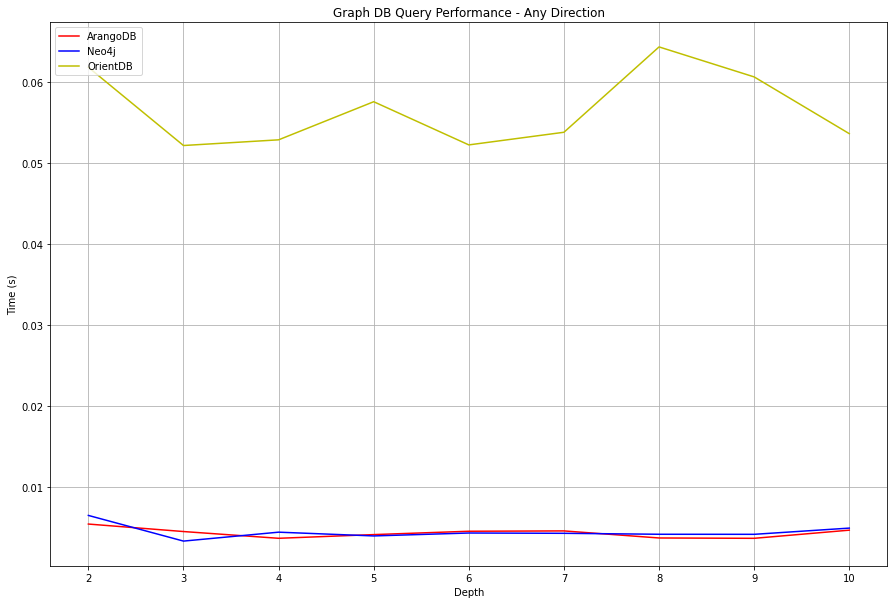

In [14]:
plt.figure(figsize=(15, 10))
plt.xlabel("Depth")
plt.ylabel("Time (s)")
plt.title("Graph DB Query Performance - Any Direction")
depth = [2,3,4,5,6,7,8,9,10]
plt.plot(depth, arango, 'r',label='ArangoDB')
plt.plot(depth, neo, 'b',label='Neo4j')
plt.plot(depth, orient, 'y',label='OrientDB')
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

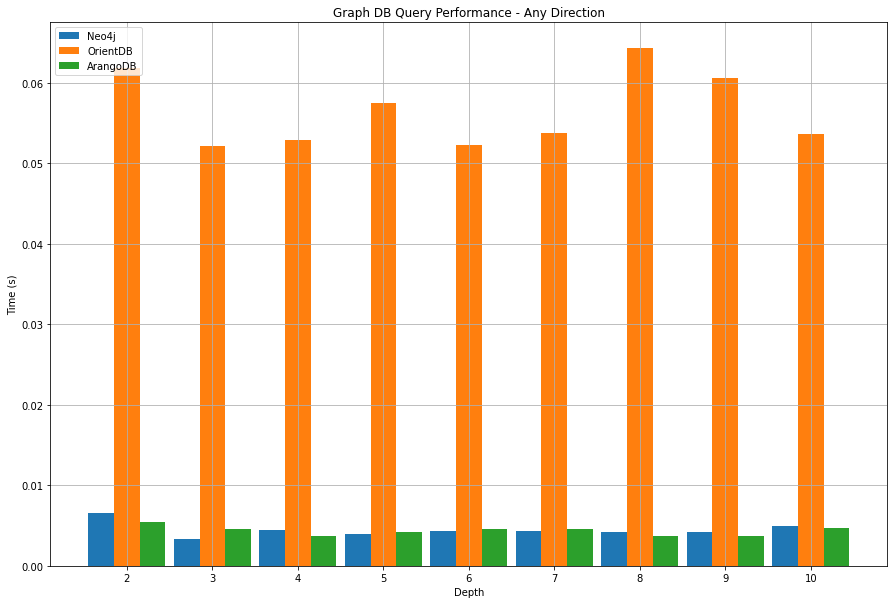

In [15]:
plt.figure(figsize=(15, 10))
w=0.3
plt.xlabel("Depth")
plt.ylabel("Time (s)")
plt.title("Graph DB Query Performance - Any Direction")
depth = [2,3,4,5,6,7,8,9,10]

bar = np.arange(len(depth))
bar1= [i+w for i in bar]
bar2= [i-w for i in bar]
plt.bar(bar2, neo, w,label='Neo4j')
plt.bar(bar, orient, w,label='OrientDB')
plt.bar(bar1, arango, w,label='ArangoDB')
plt.xticks(bar,depth)
plt.legend(loc="upper left")
plt.grid(True)
plt.show()